In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [ ]:
# Load data
data = pd.read_csv('/content/drive/My Drive/Apziva/ACME-HappinessSurvey2020.csv')

In [ ]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


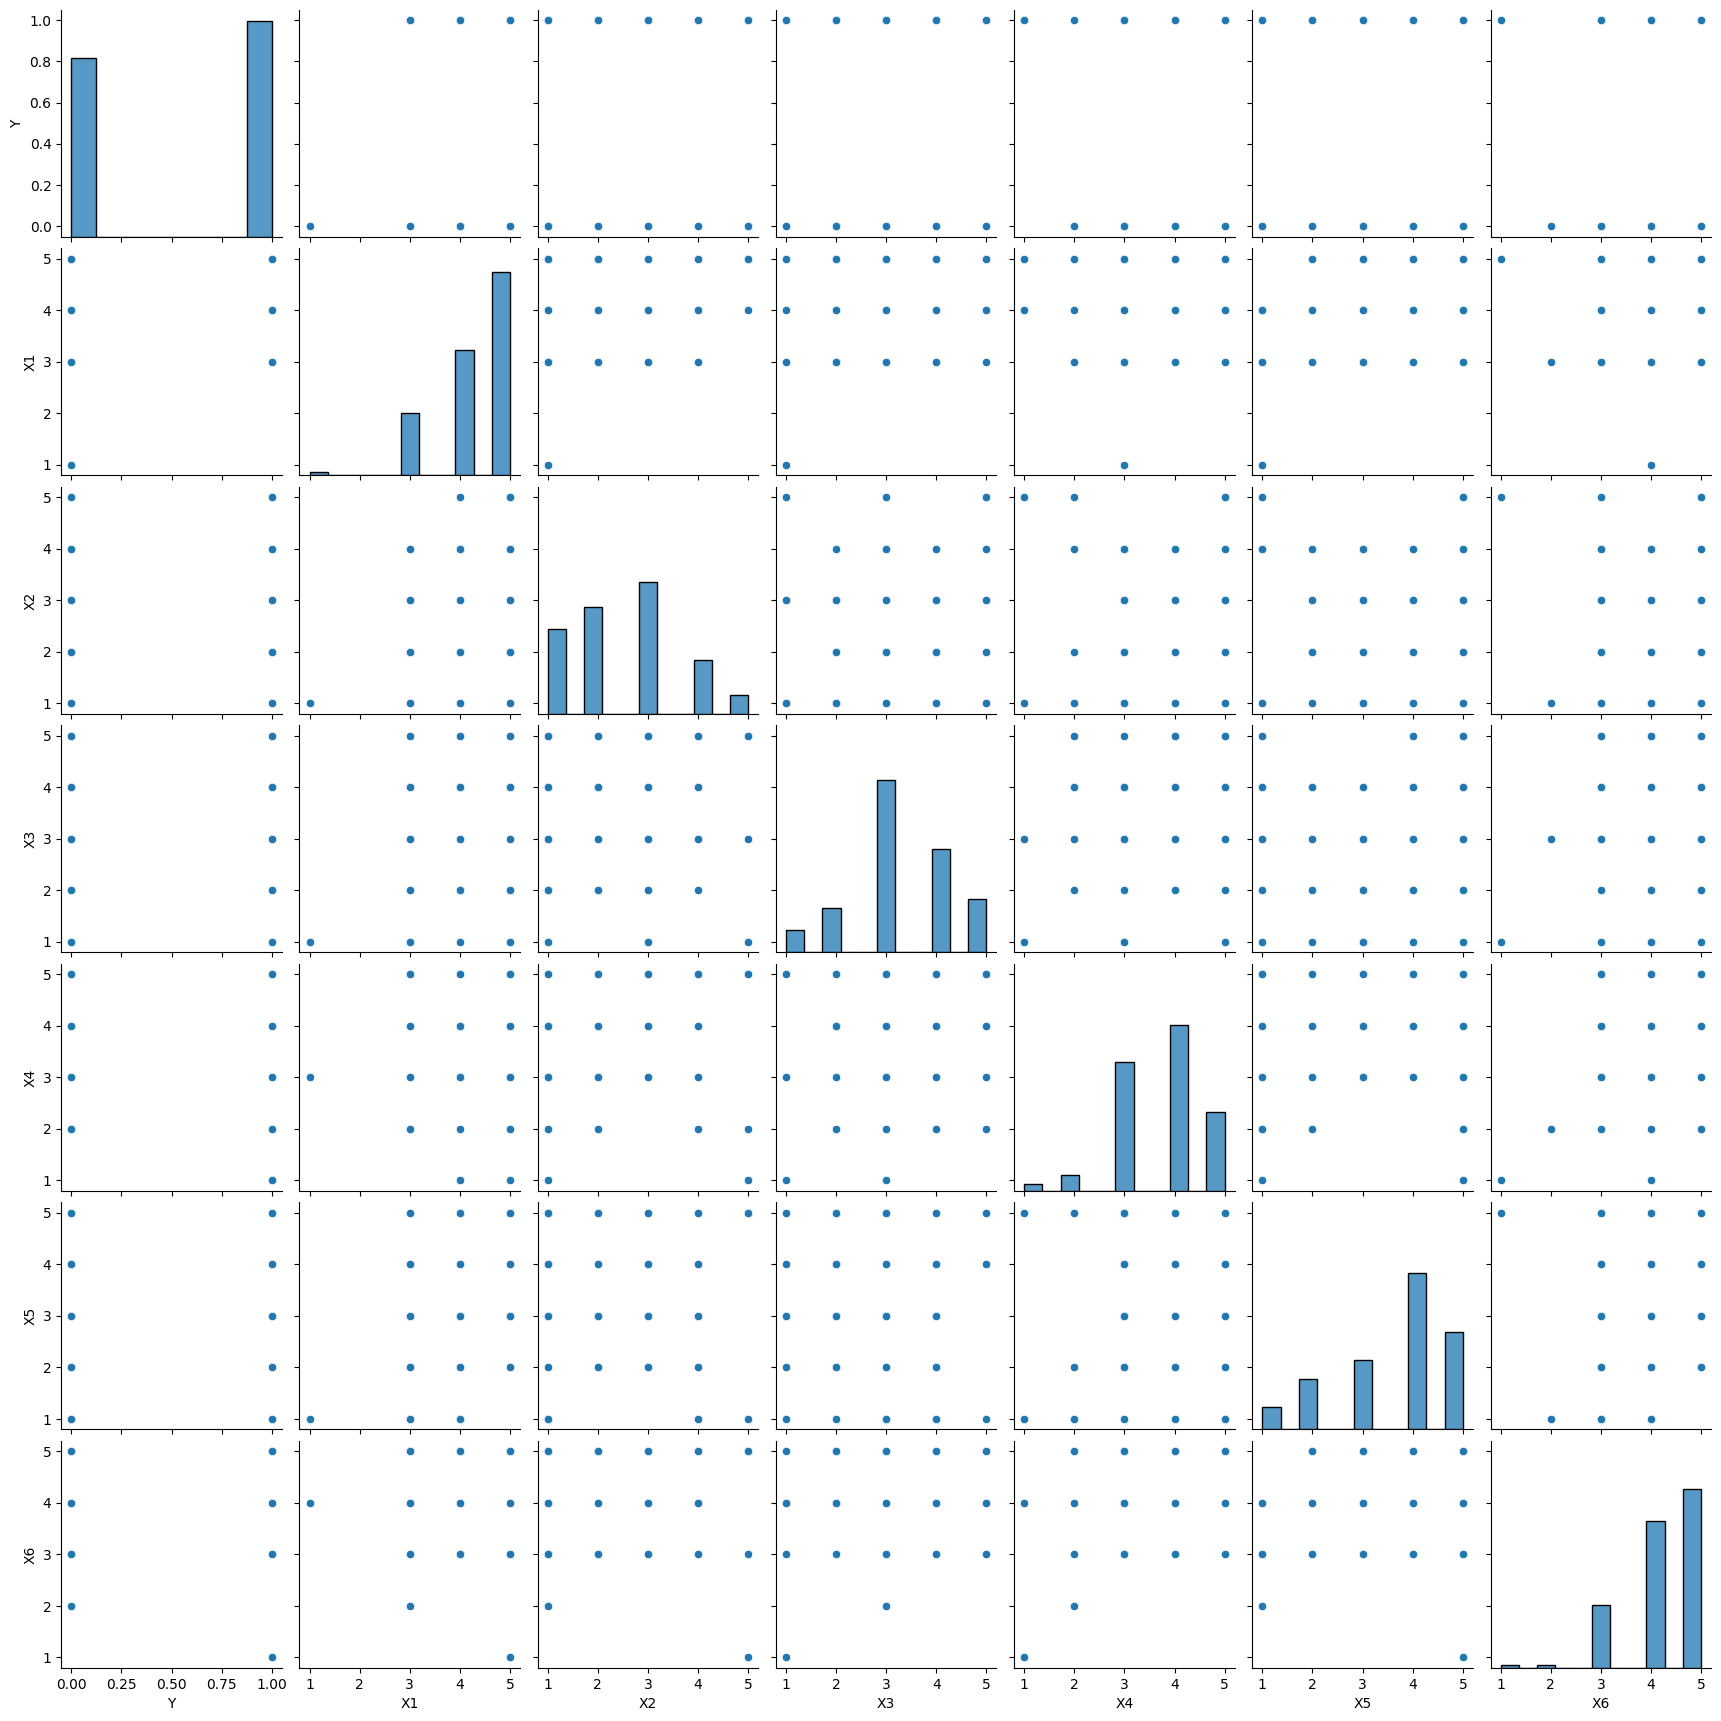

In [ ]:
# Visulization of the dataset, the visualization not really meaningful,
# The visualization did not show significant linear relationship.
sns.pairplot(data)
plt.show()

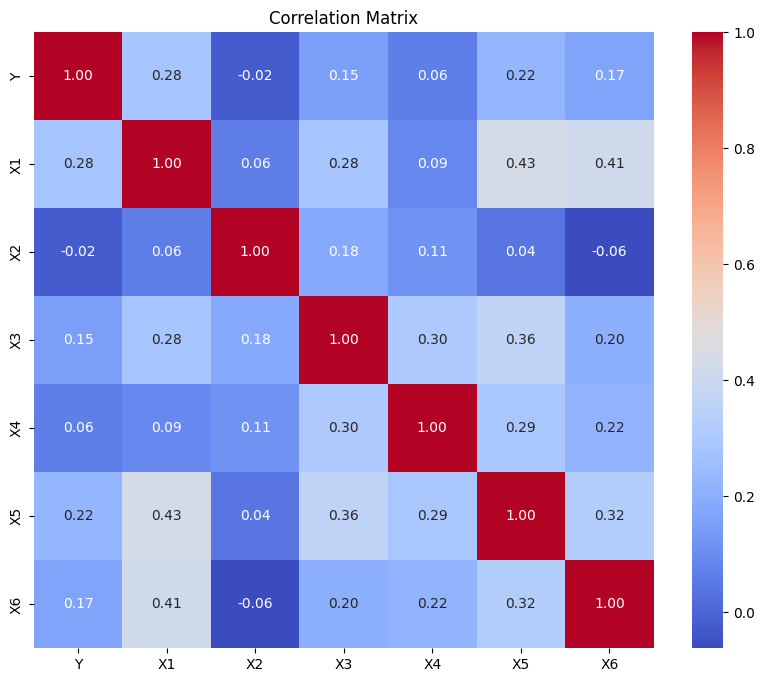

In [ ]:
# Correlation matrice, no specific correlation between feature variables and y
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

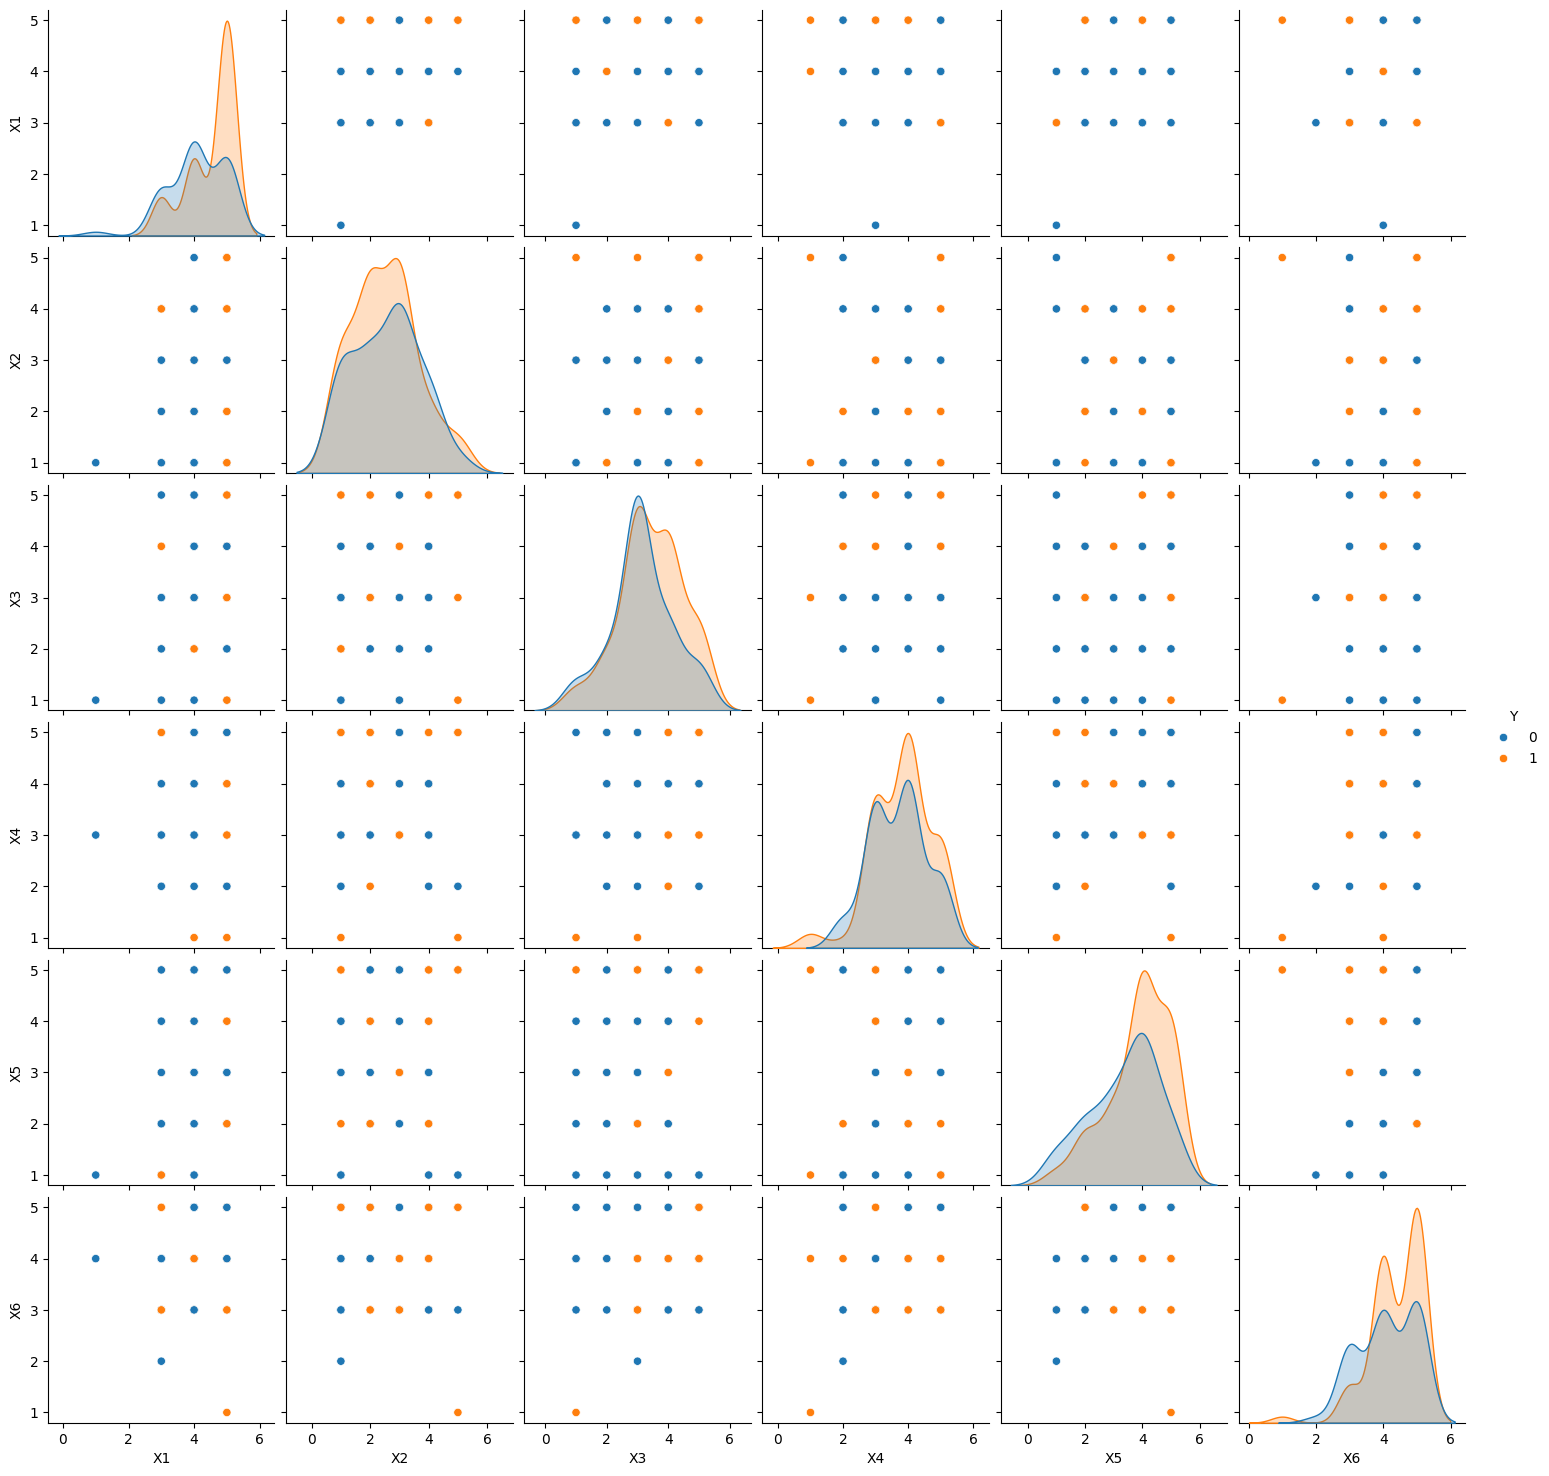

In [ ]:
sns.pairplot(data, hue='Y', diag_kind='kde')
plt.show()

In [ ]:
# Split the data into features (X1 to X6) and target (Y)
x = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = data['Y']


In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# Using LogisticRegression as the classification algorithm and train
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Evaluate the model, the accuracy not that good, there may be bias because smaller testing dataset
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.50
Precision: 0.44
Recall: 0.33
F1-score: 0.38


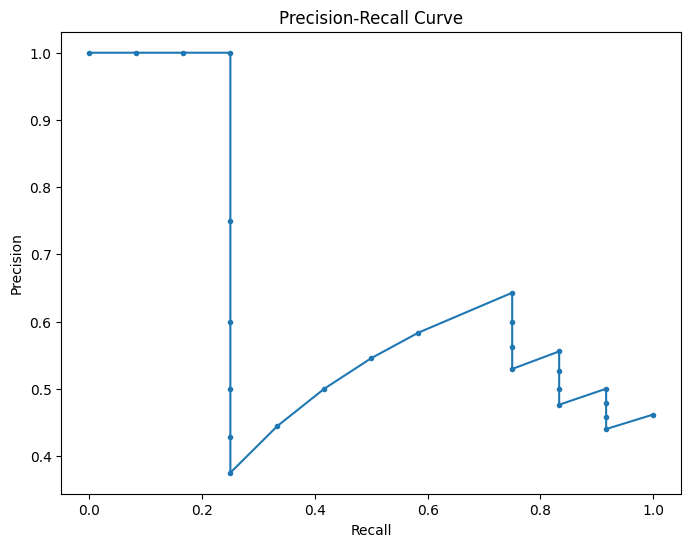

In [ ]:
# Precision-Recall Curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

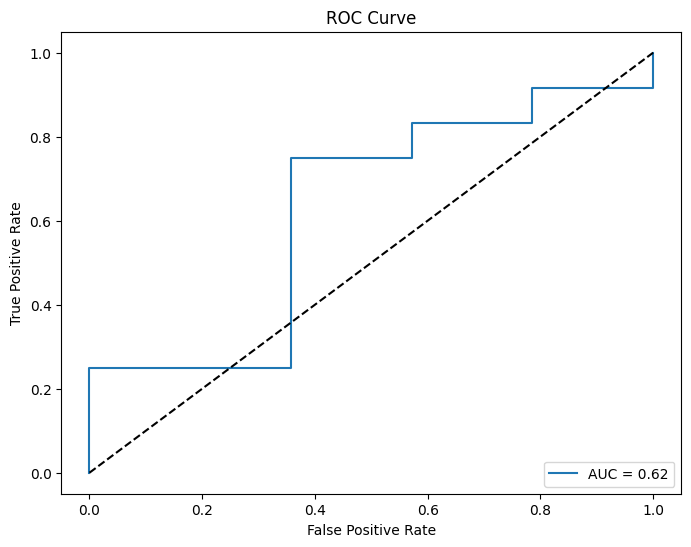

In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Using K-fold method to split and evaluate the model
# Create the StratifiedKFold cross-validator
x_scaled = scaler.fit_transform(x)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

Cross-Validation Accuracy Scores: [0.61538462 0.64       0.52       0.48       0.6       ]
Mean Cross-Validation Accuracy: 0.57
